# Larger and more frequent wildfires are cause for concern

Over the last few decades, wildfires have increased in both number and size across North America [(Schoennagel et al., 2017)](https://www.pnas.org/doi/abs/10.1073/pnas.1617464114). Regions such as the western United States have been hit particularly hard, where the problem is exacerbated by changes in climate, vegetation, and landuse. Not only are more swaths of land burning each year, but with urban sprawl forcing more people to build homes at and beyond the wildland-urban interface, increasing populations are put at risk of disaster.

In [1]:
# Import standard packages
import os                           # Reproducible file names
import warnings                     # View warnings

# Import third part packages
import cartopy.crs as ccrs          # Cartographic projections
import earthpy as et                # File organization
import geopandas as gpd             # Enables work in geodataframes
import geoviews as gv               # Enables work with geographic data
import holoviews as hv              # For use with interactive plotting
import hvplot.pandas                # Plotting maps and plots
import pandas as pd                 # Work with dataframes
import pyogrio                       # Help with import of geodatabase

warnings.simplefilter(action='ignore', category=FutureWarning)

### Native American Areas Dataset Description

The United States Geologic Survey (USGS) maintains a [National Boundary Dataset (NBD)](https://www.sciencebase.gov/catalog/item/5eaa545982cefae35a22231f) covering all 50 states and U.S. territories. The NBD includes boundaries including, but not limited to, political boundaries, national land holdings, U.S. Bureau holdings, military areas, and reserves managed by native communities. The Native American Area boundaries dataset within the NBD are derived from the [U.S. Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html). These boundaries come from the Bureau's 2017 Boundary and Annexation Survey and is a combination of two datasets that include the American Indian/Alaska Native/ Native Hawaiian Areas national data and the Alaska Native Regional Corporation state-based data. Combined, these two datasets capture federally recognized American Indian reservations and off-reservation trust land areas, state-recognized American Indian reservations, Hawaiian homelands, and 12 Alaska Native Regional Corporations.

**Data Citation:**
U.S. Geological Survey, National Geospatial Technical Operations Center, 2023, National Boundary Dataset (NBD), Native American Areas - [USGS National Map Downloadable Data Collection](https://www.sciencebase.gov/catalog/item/4f70b219e4b058caae3f8e19): U.S. Geological Survey, Reston, Virginia. Published 08/28/2023. Accessed 10/18/2023.

In [2]:
# Download national boundary data from the NBD Website
# Metadata XML File (https://thor-f5.er.usgs.gov/ngtoc/metadata/waf"
# "/boundaries/nbd/filegdb101/GovernmentUnits_National_GDB.xml")
# Data is a geodatabase of national boundaries from the entire nation
# Note, to download large data, may need to change machine type of codespace
nbd_url = (
    "https://prd-tnm.s3.amazonaws.com/StagedProducts/GovtUnit/National/GDB"
    "/GovernmentUnits_National_GDB.zip")

nbd_dir = et.data.get_data(url=nbd_url)    # Path to downloaded file directory
nbd_dir

Extracted output to /home/jovyan/earth-analytics/data/earthpy-downloads/GovernmentUnits_National_GDB


'/home/jovyan/earth-analytics/data/earthpy-downloads/GovernmentUnits_National_GDB'

In [4]:
# Import the Native American Areas layer
# Call the GDB file 
# earth-analytics/data/earthpy-downloads/GovernmentUnits_National_GDB/GovernmentUnits_National_GDB.gdb
nbd_path = os.path.join(nbd_dir, 'GovernmentUnits_National_GDB.gdb')

# Read in the GDB and layer of interest (Native American Areas)
nbd_naa_gdf = gpd.read_file(nbd_path, layer='GU_NativeAmericanArea', from_disk=True)
nbd_naa_gdf

,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,SOURCE_ORIGINATOR,DATA_SECURITY,DISTRIBUTION_POLICY,LOADDATE,NAME,AREASQKM,...,GNIS_NAME,FTYPE,FCODE,NATIVEAMERICANAREA_FIPSCODE,ADMINTYPE,POPULATION,GLOBALID,SHAPE_Length,SHAPE_Area,geometry
0,0c388825-82b2-4bda-9dd7-075955a82aa7,4110T,320084e0-96d7-4028-a1ee-0fe6c7a7faec,"TIGER/Line Shapefile, 2022, U.S., American Ind...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Table Mountain Off-Reservation Trust Land,2.926017,...,Table Mountain Rancheria,640,64096,4110T,2.0,NaN,{1AE7AC93-0C78-4F33-A2B0-03E457DB7F0D},0.197683,0.000296,"MULTIPOLYGON (((-119.65957 36.98442, -119.6595..."
1,d5648609-4d01-4e3d-bd98-51ad03a8a47d,1075T,320084e0-96d7-4028-a1ee-0fe6c7a7faec,"TIGER/Line Shapefile, 2022, U.S., American Ind...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Fallon Paiute-Shoshone (Reservation) Off-Reser...,0.646923,...,Fallon Paiute-Shoshone Reservation,640,64096,1075T,2.0,NaN,{BCE3BB3C-02BD-4BC3-A0A8-4AC751399431},0.033269,0.000068,"MULTIPOLYGON (((-118.58437 39.52676, -118.5841..."
2,b6f85967-2eb0-4b10-9d66-371d3c88f852,2115T,320084e0-96d7-4028-a1ee-0fe6c7a7faec,"TIGER/Line Shapefile, 2022, U.S., American Ind...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Manzanita Off-Reservation Trust Land,0.011818,...,Manzanita Reservation,640,64096,2115T,2.0,NaN,{54A9835A-3FD5-4DC2-93D6-C8353202ADC6},0.004383,0.000001,"MULTIPOLYGON (((-116.37835 32.74999, -116.3775..."
3,7343e0fc-7a08-4acb-a40b-f046fd75e332,1610T,320084e0-96d7-4028-a1ee-0fe6c7a7faec,"TIGER/Line Shapefile, 2022, U.S., American Ind...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Isabella Off-Reservation Trust Land,4.466588,...,Isabella Reservation,640,64096,1610T,2.0,NaN,{732EA437-C46B-4E4B-BD78-317AEFCFFEAA},0.409931,0.000500,"MULTIPOLYGON (((-83.93033 43.92176, -83.93006 ..."
4,d263cd23-03bb-4061-bb00-dcd8f42620e9,2990T,320084e0-96d7-4028-a1ee-0fe6c7a7faec,"TIGER/Line Shapefile, 2022, U.S., American Ind...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Pojoaque Off-Reservation Trust Land,2.041031,...,Pueblo of Pojoaque,640,64096,2990T,2.0,NaN,{39C6ADD3-10F2-4E91-A23C-9A48E87B2D9F},0.177511,0.000203,"MULTIPOLYGON (((-106.08519 35.59144, -106.0844..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,1f0d6997-b9d8-48a2-90b6-2eab239ec14e,0203950,c0a0e271-2faa-4842-97b2-a422edf44901,"TIGER/Line Shapefile, 2022 State, Alaska, Curr...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Arctic Slope Alaska Native Regional Corporation,232531.663788,...,Arctic Slope Alaska Native Regional Corporation,642,64200,02039,2.0,9375.0,{1C1AFD2E-5487-43E1-9B60-8E00E4745144},57.518216,53.073544,"MULTIPOLYGON (((-166.97174 68.34520, -166.9715..."
869,75b70a86-e9e2-420e-b9a2-f54482d74981,0209040,c0a0e271-2faa-4842-97b2-a422edf44901,"TIGER/Line Shapefile, 2022 State, Alaska, Curr...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Bristol Bay Alaska Native Regional Corporation,130103.857494,...,Bristol Bay Alaska Native Regional Corporation,642,64200,02090,2.0,6629.0,{AFC88040-9AE0-43B0-A378-3B2E42C75BC0},42.181789,20.248262,"MULTIPOLYGON (((-161.36493 58.74643, -161.3649..."
870,62c6dda0-33c4-4f7c-8b49-7cd256483d4b,0252120,c0a0e271-2faa-4842-97b2-a422edf44901,"TIGER/Line Shapefile, 2022 State, Alaska, Curr...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,NANA Alaska Native Regional Corporation,105204.796669,...,NANA Alaska Native Regional Corporation,642,64200,02521,2.0,7709.0,{DDB2AA1C-9260-4314-8DB9-B5C4C8BC4182},32.304724,21.635920,"MULTIPOLYGON (((-165.59199 68.03473, -165.5716..."
871,4647a563-e58b-4e82-981f-c67cfc14f4bc,0214410,c0a0e271-2faa-4842-97b2-a422edf44901,"TIGER/Line Shapefile, 2022 State, Alaska, Curr...",US Census Bureau,5,E4,2022-12-08 00:00:00+00:00,Chugach Alaska Native Regional Corporation,58399.528223,...,Chugach Alaska Native Regional Corporation,642,64200,02144,2.0,11048.0,{F3C8A229-480A-461C-A241-2A04BB9DEF03},30.075626,9.502026,"MULTIPOLYGON 

<Axes: >

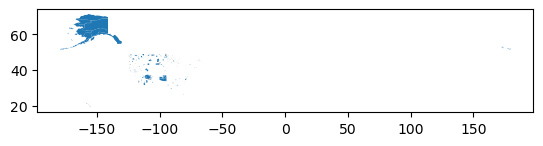

In [5]:
# Test plot to demonstrate successful import of data

nbd_naa_gdf.plot()

### Wildfire Dataset Description

The wildfire data used in this analysis comes from the [USDA's wildfire occurance data for the United States, 1992-2020](https://www.fs.usda.gov/rds/archive/Catalog/RDS-2013-0009.6). This is the fifth version of the dataset and was generated from reporting systems of federal, state, and local fire organizations. Wildfire occurences are reported from 1992-2020 and include 2.3 million wildfire records. 

**Data Citation:**
Short, Karen C. 2022. Spatial wildfire occurrence data for the United States, 1992-2020 [FPA_FOD_20221014]. 6th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.6

In [ ]:
# Download wildfire occurance data from geodatabase

fire_url = (
    "https://www.fs.usda.gov/rds/archive/products/RDS-2013-0009.6"
    "/RDS-2013-0009.6_Data_Format2_GDB.zip"
)

fire_dir = et.data.get_data(url=fire_url)   # Path to downloaded fire directory
fire_dir

In [ ]:
# Import fires layer from geodatabase (cashing data)
# Put import in an if statement to check if data already downloaded
fire_path = os.path.join(fire_dir, 'Data','FPA_FOD_20221014.gdb')
if not 'fire_gdf' in globals():
    print('fire_gdf does not exist. Loading...')
    fire_gdf = pyogrio.read_dataframe(fire_path, layer='Fires')

fire_gdf.head()                     # Prints only first few lines of data

In [ ]:
# Clean up the data (Lat/Long already assigned to geometry)
# Create an updated geodatabase, populating specific variables
# [[]] Two sets, one to search and one to define a list
fire_clean_gdf = (
    fire_gdf
    [['FOD_ID', 'DISCOVERY_DATE', 'FIRE_SIZE', 'geometry']]
    .set_index('FOD_ID')
)

# Convert the existing date to a datetime format
fire_clean_gdf.DISCOVERY_DATE = pd.to_datetime(fire_clean_gdf.DISCOVERY_DATE)

# Reproject dataframe to match the CRS of watershed boundary
print('Geodetic CRS before reprojection: ' + str(fire_clean_gdf.crs))
fire_clean_gdf = fire_clean_gdf.to_crs(wbd_hu2_gdf.crs)
print('Geodetic CRS after reprojection: ' + str(fire_clean_gdf.crs))

fire_clean_gdf                  # Use .info() to see data types

In [ ]:
# Spatially join the watershed with the fire history geodataframes
fire_region_gdf = (
    wbd_hu2_gdf[['name', 'geometry']]
    .sjoin(fire_clean_gdf, how='inner', predicate='intersects')
)

# Calculate max fire size for each year in watershed combination
fire_region_gdf = (fire_region_gdf
    .groupby(['name', fire_region_gdf.DISCOVERY_DATE.dt.year])
    .agg(
        max_fire_size=('FIRE_SIZE','max'),      # New name = old, how
        num_fires=('index_right', 'count'))     # New name = old, how
)

print('Total number of fires: ' + str(fire_region_gdf.num_fires.sum()))
fire_region_gdf

In [ ]:
#Calculate the area of each watershed (use Albers Equal Area Projection)
wbd_hu2_gdf['area_ha'] = (        # Add an area column to gdf
    wbd_hu2_gdf.to_crs(9822)      # Convert new temp gdf to Albers epsg
    .area/10000/1000000           # Calculate the watershed area (millions ha)
)                                 # Note 1 hectare is 10,000 sq.m.

# Calculate total number of fires in each watershed region
fire_count_df = (fire_region_gdf  # Note that this is a regualar dataframe
    .reset_index()                # Reset because name is currently in index
    [['name', 'num_fires']]
    .groupby('name')              # Group by the name of the region
    .sum()                        # Sum of the number of fires 
)
fire_density_gdf=(wbd_hu2_gdf     # Note that this will be a geodataframe
    .set_index('name')
    .join(fire_count_df)          # Join wbd to fire_density gdf
    [['num_fires', 'area_ha', 'geometry']] # Add area and geomety back in
)

# Calculate fire density (number of fires per area)
fire_density_gdf['fire_density_per_ha'] = (
    fire_density_gdf.num_fires / fire_density_gdf.area_ha
)

# Print the index
fire_density_gdf.fire_density_per_ha

In [ ]:
# Set values for ylabels and titles
labels = pd.DataFrame(dict(
    column_name = ['max_fire_size', 'num_fires'],
    ylabel = ['Fire Size (million ha)', 'Number of Fires'],
    title = ['Largest fire on record in the region', 
             'Total number of fires in the region']))

def fire_plot(region_name, df=fire_region_gdf, labels=labels):
    """
    Create a multi-panel plot for a region

    Parameters
    ----------
    region_name : str
      The name of the region to generate a plot for. Must exists 
      in the 'name' index of df.
    df : pd.DataFrame
      The dataframe with the data to plot. Columns much match
      an item in labels.column_name to be plotted
    labels : pd.DataFrame
      Plot labels. Must have a 'column_name', 'ylabel', and 'title'
      columns with str values. Each row will be a subplot.

    Returns
    -------
    plot : hv.core.layout.Layout
      A holoviews plot layout or similar. For use with hv.DynamicMap.
    """
    # Generate a subplot for each row in the labels
    subplots = []
    # Iterate through the labels row by row (labels is a gdf)
    for i, labs in labels.iterrows():
        # Create subplot (for each region name row in gdf, create an hvplot)
        subplot = (
            df.xs(region_name, level='name')  # Look for name in name index
            [[labs.column_name]]              # Take column name in labels gdf
            .hvplot(
                xlabel='Year', ylabel=labs.ylabel,
                title=labs.title,
                width=1000,                   # Set plot width
                color='red', size=2           # Set line color and width
            ))
        subplots.append(subplot)              # Accumulate subplots in a list

    # Stack the subplots vertically
    plot = hv.Layout(subplots).cols(1)        # Use holoview, combine subplots
    return plot

# Create a dropdown menu to switch between regions
(
    hv.DynamicMap(
        # The plotting function for the two-panel fire history
        fire_plot,
        # Define the dimension for the dropdown
        kdims=[('region', 'Region')])         # (name of index, label name)
    # Add the explicit indexing - region names as a bokeh dimension
    .redim.values(region=fire_region_gdf.reset_index().name)
)

# region = input('What do you want to use?')    # Allows user to choose

In [ ]:
# Simplify the gdf geometries
fire_density_gdf.geometry = (
    fire_density_gdf.geometry.simplify(tolerance=0.1)
)

In [ ]:
# Create a chloropleth map of fire density (geoviews polygons geometry)
poly_plot = (
    gv.Polygons(fire_density_gdf            # Use Geoviews polygon geometry
                .drop(                      # Remove Alaska and Hawaii data
                    ['Alaska Region', 'Hawaii Region'],
                      axis='rows')
                .reset_index()              # Reset index to extract 'name'
                .dropna()                   # Remove NAN values
                [['fire_density_per_ha', 'geometry']])
    .opts(                                  # Set plotting options
        width=1000, height=600,
        colorbar=True, color='fire_density',
        cmap='plasma', line_color='white',
        xaxis='bare', yaxis='bare', tools=['hover']
    )
)
((gv.tile_sources.OSM * poly_plot).opts(
    data_aspect=1,
    # projection=ccrs.PlateCarree(central_longitude=-121))
))